# Plot phase trajectories of ion and guiding center electron

In [1]:
from os.path import expanduser, join
import matplotlib.pyplot as plt
from numpy import *
import scipy
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = "Times New Roman"  # options are "Arial","Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"  # options are "stix","stixsans","cm"

## calculate the $g(\eta)$ and $dg/d\eta$ functions

In [2]:
# limits for \beta
beta_0 = 0.0
beta_1 = pi / 2.0

# how to sample \eta
eta_min = 1.0e-10
eta_max = 1.0
eta_num = 1000

def g_integrand(beta, eta):
    value = sqrt( ((1.0 - eta) * sin(beta)**2 + eta) / 
                 ((1.0 - eta) * sin(beta)**2 + 2.0 * eta)) * cos(beta)**2
    value *= 8.0 * sqrt(2.0)
    return value

def dg_deta_integrand(beta, eta):
    value = sin(beta)**2 * cos(beta)**2
    value /= ((1.0 - eta) * sin(beta)**2 + eta)**(0.5) * ((1.0 - eta) * sin(beta)**2 + 2.0 * eta)**(1.5)
    value *= - 4.0 * sqrt(2.0)
    return value

In [3]:
print('g_integrand(beta_0, eta_min) = ', g_integrand(beta_0, eta_min))
print('g_integrand(beta_0, eta_max) = ', g_integrand(beta_0, eta_max))
print('g_integrand(beta_1, eta_min) = ', g_integrand(beta_1, eta_min))
print('g_integrand(beta_1, eta_max) = ', g_integrand(beta_1, eta_max))
print('g_integrand(beta_m, eta_m) = ', g_integrand((beta_0+beta_1)/2.0, (eta_min+eta_max)/2.0))

print('dg_deta_integrand(beta_0, eta_min) = ', dg_deta_integrand(beta_0, eta_min))
print('dg_deta_integrand(beta_0, eta_max) = ', dg_deta_integrand(beta_0, eta_max))
print('dg_deta_integrand(beta_1, eta_min) = ', dg_deta_integrand(beta_1, eta_min))
print('dg_deta_integrand(beta_1, eta_max) = ', dg_deta_integrand(beta_1, eta_max))
print('dg_deta_integrand(beta_m, eta_m) = ', dg_deta_integrand((beta_0+beta_1)/2.0, (eta_min+eta_max)/2.0))

g_integrand(beta_0, eta_min) =  8.000000000000002
g_integrand(beta_0, eta_max) =  8.000000000000002
g_integrand(beta_1, eta_min) =  4.2419612496721506e-32
g_integrand(beta_1, eta_max) =  2.999519565323716e-32
g_integrand(beta_m, eta_m) =  4.381780459982907
dg_deta_integrand(beta_0, eta_min) =  -0.0
dg_deta_integrand(beta_0, eta_max) =  -0.0
dg_deta_integrand(beta_1, eta_min) =  -2.1209806246239776e-32
dg_deta_integrand(beta_1, eta_max) =  -7.498798913309288e-33
dg_deta_integrand(beta_m, eta_m) =  -1.1684747892197171


In [4]:
eta = eta_max
g = quad(g_integrand, beta_0, beta_1, args=(eta))[0]
print(eta, g/(2.0*pi))

dg_deta = quad(dg_deta_integrand, beta_0, beta_1, args=(eta))[0]
print(eta, dg_deta/(2.0*pi))

1.0 1.0000000000000002
1.0 -0.0625


0.5393384592735758
0.0625


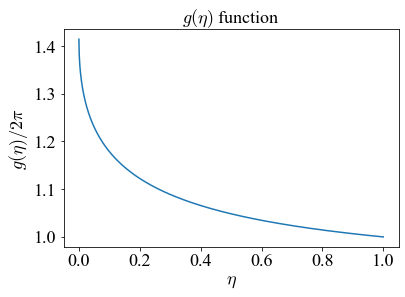

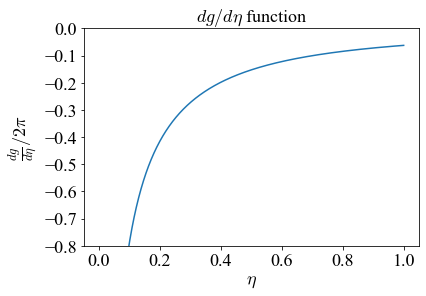

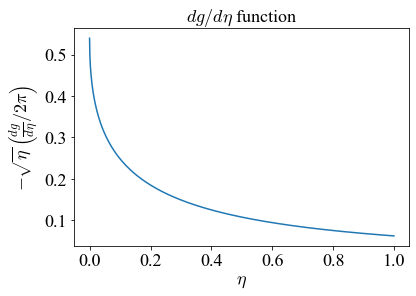

In [5]:
eta_values = linspace(eta_min, eta_max, num=eta_num)
g_values = zeros((eta_num))
dg_deta_values = zeros((eta_num))

for i, eta in enumerate(eta_values):
    g_values[i] = quad(g_integrand, beta_0, beta_1, args=(eta))[0]
    dg_deta_values[i] = quad(dg_deta_integrand, beta_0, beta_1, args=(eta))[0]
    
fig, ax = plt.subplots()
dummy = plt.plot(eta_values, g_values/(2.0*pi))
dummy = plt.title(r'$g(\eta)$ function', fontsize=18)
dummy = plt.xlabel(r'$\eta$', fontsize=18)
dummy = plt.ylabel(r'$g(\eta) / 2 \pi$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)

fig, ax = plt.subplots()
dummy = plt.plot(eta_values[1:-1], dg_deta_values[1:-1] /(2.0*pi))
dummy = plt.title(r'$dg/d\eta$ function', fontsize=18)
dummy = plt.xlabel(r'$\eta$', fontsize=18)
dummy = plt.ylabel(r'$\frac{d g}{d \eta} / 2 \pi$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.ylim([-0.8,0.0])

fig, ax = plt.subplots()
dummy = plt.plot(eta_values[0:-1], - dg_deta_values[0:-1] * sqrt(eta_values[0:-1]) /(2.0*pi))
dummy = plt.title(r'$dg/d\eta$ function', fontsize=18)
dummy = plt.xlabel(r'$\eta$', fontsize=18)
dummy = plt.ylabel(r'$- \sqrt{\eta} \, \left( \frac{d g}{d \eta} / 2 \pi \right)$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)

print(-dg_deta_values[0] * sqrt(eta_values[0]) /(2.0*pi))
print(-dg_deta_values[-1] * sqrt(eta_values[-1]) /(2.0*pi))

In [6]:
print(dg_deta_values[0])
print((g_values[0],g_values[-1]))
print((2.0 * sqrt(2.0) * pi, 2.0 * pi))

-338876.34829046065
(8.885765877170313, 6.283185307179588)
(8.885765876316732, 6.283185307179586)


1.4142135623730951
-53933.84592735757
-0.0625
-53933.84592735757


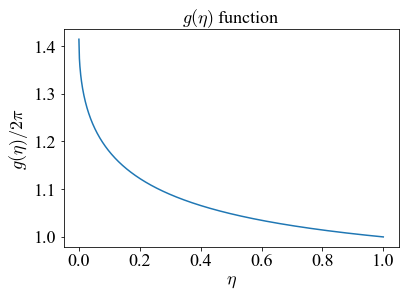

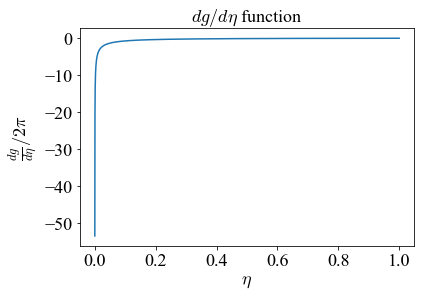

In [7]:
g_interpolate = interp1d(eta_values, g_values, kind='linear', bounds_error = False, 
                               fill_value=(2.0 * sqrt(2.0) * pi, 2.0 * pi))
dg_deta_sqrt_interpolate = interp1d(eta_values, dg_deta_values * sqrt(eta_values), kind='linear', bounds_error = False, 
                               fill_value=(dg_deta_values[0] * sqrt(eta_values[0]), dg_deta_values[-1] * sqrt(eta_values[-1])))
def dg_deta_interpolate(eta):
    value = dg_deta_sqrt_interpolate(eta) / sqrt(eta)
    return value

print(g_interpolate(0.0) / (2.0 * pi))
print(dg_deta_interpolate(1.0e-10) / (2.0 * pi))
print(dg_deta_interpolate(1.0) / (2.0 * pi))
print(dg_deta_values[0] / (2.0 * pi))

eta1_values = linspace(0.0, 1.0, num=10000)
    
fig, ax = plt.subplots()
dummy = plt.plot(eta1_values, g_interpolate(eta1_values)/(2.0*pi))
dummy = plt.title(r'$g(\eta)$ function', fontsize=18)
dummy = plt.xlabel(r'$\eta$', fontsize=18)
dummy = plt.ylabel(r'$g(\eta) / 2 \pi$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
# plt.xlim([-0.02,1.52])
# plt.ylim([0.0,6.0])

fig, ax = plt.subplots()
dummy = plt.plot(eta1_values, dg_deta_interpolate(eta1_values)/(2.0*pi))
dummy = plt.title(r'$dg/d\eta$ function', fontsize=18)
dummy = plt.xlabel(r'$\eta$', fontsize=18)
dummy = plt.ylabel(r'$\frac{d g}{d \eta} / 2 \pi$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
# dummy = plt.ylim([-0.8,0.0]) 

## calculate the $\eta(y)$ and $d\eta/dy$ functions

In [8]:
def eta_root(eta, y):
    value = (1.0 - y) / (1.0 - eta)
    value *= sqrt(eta / y)
    value -= g_interpolate(eta) / g_interpolate(1.0)
    return value

print(eta_root(0.001,0.0005))

0.03343339676087331


In [9]:
y_value = 0.9

eta_value = root_scalar(eta_root, bracket=(0.000001,0.999999),
                        args=(y_value), method='bisect').root

print((y_value, eta_value))

(0.9, 0.9006277832253778)


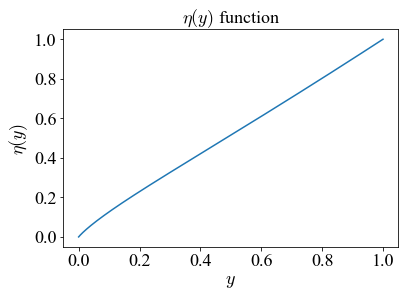

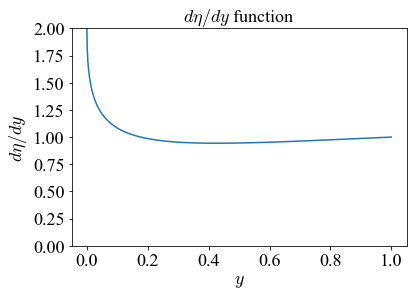

In [10]:
# how to sample y
small_number = 1.0e-8
y_min = small_number
y_max = 1.0 - small_number
y_num = 1000

y_values = linspace(y_min, y_max, num=y_num)
eta2_values = zeros((y_num))
deta_dy_values = zeros((y_num))

for i, y_value in enumerate(y_values):
    eta2_values[i] = root_scalar(eta_root, bracket=(0.1 * small_number,1.0 - 0.1 * small_number),
                            args=(y_value), method='bisect').root
    eta = eta2_values[i]
    deta_dy_values[i] = (eta / y_value)**(1.5)
    deta_dy_values[i] *= (1.0 + y_value) * g_interpolate(1.0) / 2.0
    deta_dy_values[i] /= (1.0 + eta) * g_interpolate(eta) / 2.0 - eta * (1.0 - eta) * dg_deta_interpolate(eta)
    
fig, ax = plt.subplots()
dummy = plt.plot(y_values, eta2_values)
dummy = plt.title(r'$\eta(y)$ function', fontsize=18)
dummy = plt.xlabel(r'$y$', fontsize=18)
dummy = plt.ylabel(r'$\eta(y)$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
  
fig, ax = plt.subplots()
dummy = plt.plot(y_values, deta_dy_values)
dummy = plt.title(r'$d \eta / dy$ function', fontsize=18)
dummy = plt.xlabel(r'$y$', fontsize=18)
dummy = plt.ylabel(r'$d \eta / dy$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.ylim([0.0,2.0])


In [11]:
print(eta2_values[0]/y_values[0])
print((g_interpolate(0.0)/g_interpolate(1.0))**2)
print(deta_dy_values[0])

1.999934428203778
1.9999999999999991
1.9996868460176143


0.0
1.0


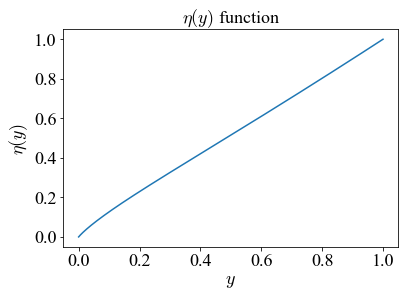

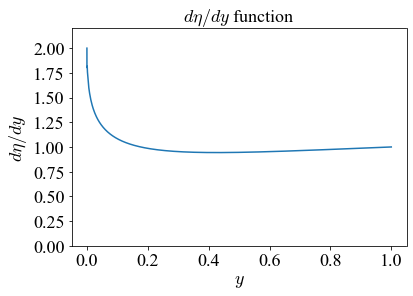

In [12]:
eta_interpolate = interp1d(y_values, eta2_values, kind='linear', bounds_error = False, 
                               fill_value=(0.0, 1.0))

deta_dy_interpolate = interp1d(y_values, deta_dy_values, kind='linear', bounds_error = False, 
                               fill_value=(2.0, 1.0))

def deta_dy_interpolate(y_value):
    eta = eta_interpolate(y_value)
    value = (eta / y_value)**(1.5)
    value *= (1.0 + y_value) * g_interpolate(1.0) / 2.0
    value /= (1.0 + eta) * g_interpolate(eta) / 2.0 - eta * (1.0 - eta) * dg_deta_interpolate(eta)
    return value

print(eta_interpolate(0.0))
print(eta_interpolate(1.0))

y1_values = linspace(small_number, 1.0, num=10000)
    
fig, ax = plt.subplots()
dummy = plt.plot(y1_values, eta_interpolate(y1_values))
dummy = plt.title(r'$\eta(y)$ function', fontsize=18)
dummy = plt.xlabel(r'$y$', fontsize=18)
dummy = plt.ylabel(r'$\eta(y)$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
  
fig, ax = plt.subplots()
dummy = plt.plot(y1_values, deta_dy_interpolate(y1_values))
dummy = plt.title(r'$d \eta / dy$ function', fontsize=18)
dummy = plt.xlabel(r'$y$', fontsize=18)
dummy = plt.ylabel(r'$d \eta / dy$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.ylim([0.0,2.2])


## calculate the separatrix and phase space tragectories

### set up the needed functions

In [13]:
def y_A_function(a_value):
    value = a_value / (2.0 * g_interpolate(1.0))
    value -= sqrt((a_value / (2.0 * g_interpolate(1.0)))**2 + 1)
    value *= value
    return value

def h_function(action_z, rho, psi):
    # input Jz / 2 pi for action_z
    a = 2.0 * pi * action_z / sqrt(rho)
    value = rho * sin(psi)
    value -= eta_interpolate(y_A_function(a)) / rho
    return value

def dpsi_dt_function(action_z, rho, psi):
    # input Jz / 2 pi for action_z
    a = 2.0 * pi * action_z / sqrt(rho)
    y = y_A_function(a)
    dydA = - 2.0 * y**(1.5) / (1+y) / g_interpolate(1.0)
    
    value = sin(psi) / rho
    value += (eta_interpolate(y) + 0.5 * a * deta_dy_interpolate(y) * dydA) / rho**3
    return value

def dh_drho_function(action_z, rho, psi):
    # input Jz / 2 pi for action_z
    a = 2.0 * pi * action_z / sqrt(rho)
    y = y_A_function(a)
    dydA = - 2.0 * y**(1.5) / (1+y) / g_interpolate(1.0)
#     print('eta = ', eta_interpolate(y))
#     print('a = ',a)
#     print('dy/dA = ',dydA)
#     print('deta/dy = ', deta_dy_interpolate(y))
#     print('A/2 deta/dA = ', 0.5 * a * deta_dy_interpolate(y) * dydA)
#     print('1/rho^2 = ', 1.0 / rho**2)
    
    value = sin(psi)
    value += (eta_interpolate(y) + 0.5 * a * deta_dy_interpolate(y) * dydA) / rho**2
    return value
    
def separatrix_function(rho, action_z):
    # input Jz / 2 pi for action_z
    value = dh_drho_function(action_z, rho, - pi / 2.0)
    return value

print(y_A_function(0.0))
print(y_A_function(10000.0))
print(separatrix_function(0.000001,0.5))

1.0
3.94783864348907e-07
252752.8723691953


0.11864933001404901


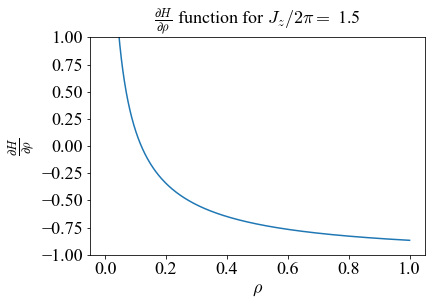

In [14]:
action_z = 1.5

# how to sample \action
rho_min = 1.0e-6
rho_max = 1.0
rho_num = 1000

rho_values = linspace(rho_min, rho_max, num=rho_num)

# how to sample \action
action_z_tpi_min = 0.0
action_z_tpi_max = 3.0
action_z_tpi_num = 1000

fig, ax = plt.subplots()
dummy = plt.plot(rho_values, separatrix_function(rho_values, action_z))
dummy = plt.title(r'$\frac{\partial H}{\partial \rho}$ function for $J_z / 2 \pi =$ %3.1f' % action_z, fontsize=18)
dummy = plt.xlabel(r'$\rho$', fontsize=18)
dummy = plt.ylabel(r'$\frac{\partial H}{\partial \rho}$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.ylim([-1.0,1.0])

rho_separatrix = root_scalar(separatrix_function, bracket=(rho_min,rho_max),
                        args=(action_z), method='bisect').root

print(rho_separatrix)

### calculate the radius, $\rho_s$, and energy, $H_s$, of the separatrix

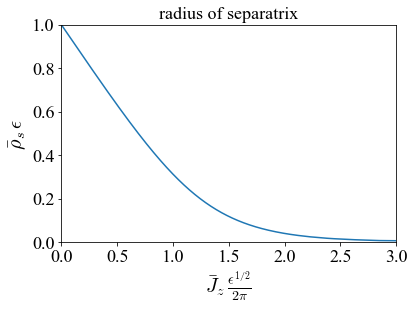

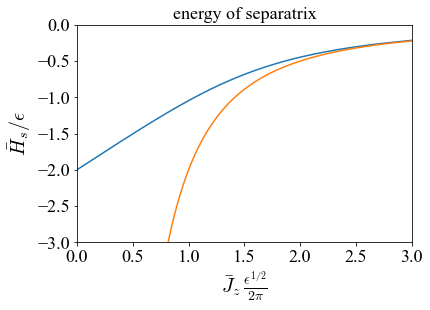

In [15]:
action_values = linspace(action_z_tpi_min, action_z_tpi_max, num=action_z_tpi_num)
rho_s_values = zeros((action_z_tpi_num))
h_s_values = zeros((action_z_tpi_num))
h_min_values = zeros((action_z_tpi_num))

for i, action_z_tpi in enumerate(action_values):
    rho_s_values[i] = root_scalar(separatrix_function, bracket=(rho_min,rho_max),
                            args=(action_z_tpi), method='bisect').root
    h_s_values[i] = h_function(action_z_tpi, rho_s_values[i], - pi / 2.0)
    h_min_values[i] = - 2.0 / action_z_tpi**2

fig, ax = plt.subplots()
dummy = plt.plot(action_values, rho_s_values)
dummy = plt.title('radius of separatrix', fontsize=18)
dummy = plt.xlabel(r'$\bar{J}_z \, \frac{\epsilon^{1/2}}{2 \pi}$', fontsize=20)
dummy = plt.ylabel(r'$\bar{\rho}_s \, \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([0.0,3.0])
dummy = plt.ylim([0.0,1.0])

ig, ax = plt.subplots()
dummy = plt.plot(action_values, h_s_values)
dummy = plt.plot(action_values, h_min_values)
dummy = plt.title('energy of separatrix', fontsize=18)
dummy = plt.xlabel(r'$\bar{J}_z \, \frac{\epsilon^{1/2}}{2 \pi}$', fontsize=20)
dummy = plt.ylabel(r'$\bar{H}_s / \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([0.0,3.0])
dummy = plt.ylim([-3.0,0.0])

### set up to calculate $\rho(H,J_z,\psi)$

h_min =  -12.537622251116513
-1.602746023429133 0.3993993993993994 -1.2566370614359172
-10.148168114668884 0.03441934450431816


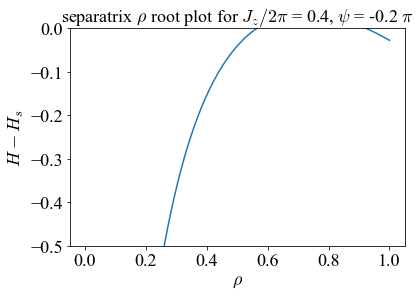

In [16]:
action_z_find = 0.4
idx = abs(action_values - action_z_find).argmin()
h = h_s_values[idx]
action_z = action_values[idx]
psi = -0.4 * pi

h_min = h_function(action_z, small_number, 0.0)
h_min = - 2.0 / action_z**2
print('h_min = ', h_min)

def rho_root(rho, h, action_z, psi):
    # input Jz / 2 pi for action_z
    value = h_function(action_z, rho, psi) - h
    return value

rho_num = 1000
rho_values = linspace(rho_min, rho_max, num=rho_num)
rho_root_values = zeros((rho_num))

print(h, action_z, psi)

for i, rho in enumerate(rho_values):
    rho_root_values[i] = rho_root(rho, h, action_z, psi)
fig, ax = plt.subplots()
dummy = plt.plot(rho_values, rho_root_values)
dummy = plt.title(r'separatrix $\rho$ root plot for $J_z / 2 \pi$ = %3.1f, $\psi$ = %3.1f $\pi$' % (action_z, psi/(2.0*pi)), fontsize=18)
dummy = plt.xlabel(r'$\rho$', fontsize=18)
dummy = plt.ylabel(r'$H - H_s$', fontsize=18)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.ylim([-0.5,0.0])

print(rho_root_values[0],rho_root(rho_s_values[idx], h, action_z, psi))

In [17]:
rho_phase = root_scalar(rho_root, bracket=(rho_min,rho_s_values[idx]),
                        args=(h, action_z, psi), method='bisect').root

print(h, action_z, psi, rho_phase, rho_s_values[idx])

-1.602746023429133 0.3993993993993994 -1.2566370614359172 0.5638386814283034 0.7032467225235501


J-ExB =  0.47137201808098983


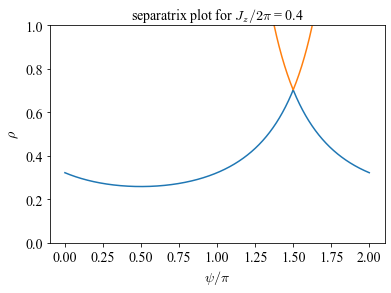

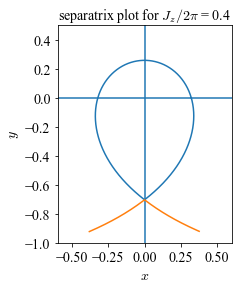

In [18]:
rho_s_interpolate = interp1d(action_values, rho_s_values, kind='linear', bounds_error = False, 
                               fill_value=(rho_s_values[0], rho_s_values[-1]))
h_s_interpolate = interp1d(action_values, h_s_values, kind='linear', bounds_error = False, 
                               fill_value=(h_s_values[0], h_s_values[-1]))

def rho_phase_plot(action_z, h, psi_num=1000):
    # input Jz / 2 pi for action_z
    h_min = - 2.0 / (action_z + small_number)**2
#     print(h, h_min, h_s_interpolate(action_z))
    if h < h_min or h > h_s_interpolate(action_z):
        print('h must be greater than %5.1f and less than %5.1f' % (h_min,h_s_interpolate(action_z)))
        return
    rho_min = 1.0e-6
    rho_max = 1.0
    
    psi_values = linspace(0.0, 2 * pi, num=psi_num)
    rho_phase_values = zeros((psi_num))
    rho_phase_values_2 = zeros((psi_num))

    for i, psi in enumerate(psi_values):
        rho_phase_values[i] = root_scalar(rho_root, bracket=(rho_min,rho_s_interpolate(action_z)),
                        args=(h, action_z, psi), method='bisect').root
        if rho_root(rho_max, h, action_z, psi) < 0.0:
            rho_phase_values_2[i] =  root_scalar(rho_root, bracket=(rho_s_interpolate(action_z),rho_max),
                    args=(h, action_z, psi), method='bisect').root
        else:
            rho_phase_values_2[i] = nan

    jd_interpolate = interp1d(psi_values, rho_phase_values, kind='linear', bounds_error = False, 
                                   fill_value=(rho_phase_values[0], rho_phase_values[-1]))
    def jd_integrand(psi):
        value = jd_interpolate(psi) * jd_interpolate(psi) / 2.0
        return value

    jd = quad(jd_integrand, 0.00, 2.0 * pi)[0]
    return psi_values, rho_phase_values, rho_phase_values_2, jd

def action_idx_exact(action):    
    idx = abs(action - action_values).argmin()
    return action_values[idx], idx

action_z_find = 0.4
action_z_find, idx = action_idx_exact(action_z_find)

psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_values[idx], h_s_interpolate(action_values[idx]))
print('J-ExB = ', jd_s)

fig, ax = plt.subplots()
dummy = plt.plot(psi_values/pi, rho_phase_values)
dummy = plt.plot(psi_values/pi, rho_phase_values_2)
dummy = plt.title(r'separatrix plot for $J_z / 2 \pi$ = %3.1f' % (action_z), fontsize=14)
dummy = plt.xlabel(r'$\psi / \pi$', fontsize=14)
dummy = plt.ylabel(r'$\rho$', fontsize=14)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=14)
dummy = plt.ylim([0.0,1.0])

fig, ax = plt.subplots()
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values))
dummy = plt.plot(rho_phase_values_2*cos(psi_values), rho_phase_values_2*sin(psi_values))
dummy = plt.title(r'separatrix plot for $J_z / 2 \pi$ = %3.1f' % (action_z), fontsize=14)
dummy = plt.xlabel(r'$x$', fontsize=14)
dummy = plt.ylabel(r'$y$', fontsize=14)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=14)
dummy = plt.xlim([-0.6,0.6])
dummy = plt.ylim([-1.0,0.5])
dummy = ax.set_aspect('equal')
dummy = plt.hlines(0.0,-0.6,0.6)
dummy = plt.vlines(0.0,-1.0,0.5)

### calculate the phase space trajectories and separatrix

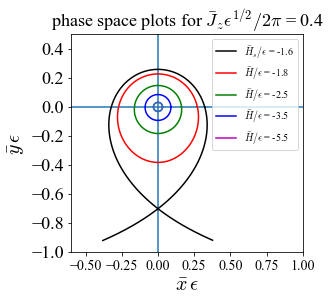

In [19]:
fig, ax = plt.subplots()

action_z =0.4

h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'k-', label=r'$\bar{H}_s / \epsilon$ = %4.1f' % h)
dummy = plt.plot(rho_phase_values_2*cos(psi_values), rho_phase_values_2*sin(psi_values), 'k-')

h = -1.8
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'r-', label=r'$\bar{H} / \epsilon$ = %4.1f' % h)

h = -2.5
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'g-', label=r'$\bar{H} / \epsilon$ = %4.1f' % h)

h = -3.5
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'b-', label=r'$\bar{H} / \epsilon$ = %4.1f' % h)

h = -5.5
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'm-', label=r'$\bar{H} / \epsilon$ = %4.1f' % h)

dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values))
dummy = plt.title(r'phase space plots for $\bar{J}_z \epsilon^{1/2} / 2 \pi$ = %3.1f' % (action_z), fontsize=18)
dummy = plt.xlabel(r'$\bar{x} \, \epsilon$', fontsize=20)
dummy = plt.ylabel(r'$\bar{y} \, \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([-0.6,1.0])
dummy = plt.ylim([-1.0,0.5])
dummy = ax.set_aspect('equal')
dummy = plt.hlines(0.0,-0.6,1.0)
dummy = plt.vlines(0.0,-1.0,0.5)
dummy = plt.legend(loc='best')

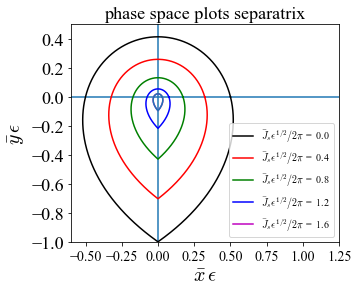

In [20]:
fig, ax = plt.subplots()

action_z = 0.0
action_z, idx = action_idx_exact(action_z)
h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'k-', label=r'$\bar{J}_s \epsilon^{1/2}/2 \pi$ = %4.1f' % action_z)

action_z = 0.4
action_z, idx = action_idx_exact(action_z)
h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'r-', label=r'$\bar{J}_s \epsilon^{1/2}/2 \pi$ = %4.1f' % action_z)

action_z = 0.8
action_z, idx = action_idx_exact(action_z)
h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'g-', label=r'$\bar{J}_s \epsilon^{1/2}/2 \pi$ = %4.1f' % action_z)

action_z = 1.2
action_z, idx = action_idx_exact(action_z)
h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'b-', label=r'$\bar{J}_s \epsilon^{1/2}/2 \pi$ = %4.1f' % action_z)

action_z = 1.6
action_z, idx = action_idx_exact(action_z)
h = h_s_interpolate(action_z)
psi_values, rho_phase_values, rho_phase_values_2, jd_s = rho_phase_plot(action_z, h)
dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values), 'm-', label=r'$\bar{J}_s \epsilon^{1/2}/2 \pi$ = %4.1f' % action_z)

dummy = plt.plot(rho_phase_values*cos(psi_values), rho_phase_values*sin(psi_values))
dummy = plt.title(r'phase space plots separatrix', fontsize=18)
dummy = plt.xlabel(r'$\bar{x} \, \epsilon$', fontsize=20)
dummy = plt.ylabel(r'$\bar{y} \, \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([-0.6,1.25])
dummy = plt.ylim([-1.0,0.5])
dummy = ax.set_aspect('equal')
dummy = plt.hlines(0.0,-0.6,1.25)
dummy = plt.vlines(0.0,-1.0,0.5)
dummy = plt.legend(loc='best')

### calculate $J_{Ds}(J_z)$ of the separatrix

In [21]:
# how to sample \action
action_z_tpi_min = 0.0
action_z_tpi_max = 1.6
action_z_tpi_num = 30
action_values_2 = linspace(action_z_tpi_min, action_z_tpi_max, num=action_z_tpi_num)
jd_s_values = zeros((action_z_tpi_num))

for i, action_z in enumerate(action_values_2):
    action_z, idx = action_idx_exact(action_z)
    h = h_s_interpolate(action_z)
    psi_values, rho_phase_values, rho_phase_values_2, jd_s_values[i] = rho_phase_plot(action_z, h)
    

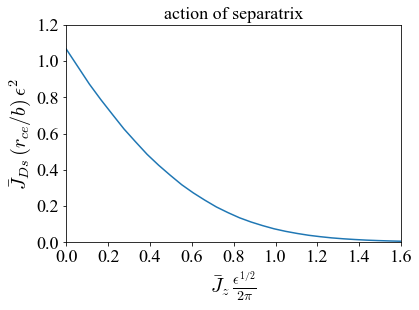

In [47]:
dummy = plt.plot(action_values_2, jd_s_values)
dummy = plt.title(r'action of separatrix', fontsize=18)
dummy = plt.xlabel(r'$\bar{J}_z \, \frac{\epsilon^{1/2}}{2 \pi}$', fontsize=20)
dummy = plt.ylabel(r'$\bar{J}_{Ds} \, (r_{ce}/b) \, \epsilon^2$', fontsize=20)
dummy = plt.xticks(fontsize=18)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([0.0,1.6])
dummy = plt.ylim([0.0,1.2])

### contour plot the energy, $H(J_z;x, y)$ to show the phase space trajectories

In [24]:
x_min = -1.5
x_max = 1.5
x_num = 500
y_min = -1.5
y_max = 1.5
y_num = 500

x_values = linspace(x_min, x_max, num=x_num)
y_values = linspace(y_min, y_max, num=y_num)
h_values = zeros((x_num, y_num))

action_z = 0.4

for i, x_value in enumerate(x_values):
    for j, y_value in enumerate(y_values):
        rho = sqrt( x_values[i]**2 + y_values[j]**2 )
        psi = arcsin(y_values[j] / (rho + small_number))
        h_values[j,i] = h_function(action_z, rho, psi)

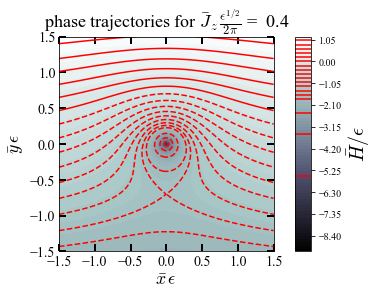

In [25]:
origin = 'lower'

fig1, ax2 = plt.subplots(constrained_layout=True)

CS = ax2.contourf(x_values, y_values, h_values, 100, cmap=plt.cm.bone, origin=origin)

levels = [1.03,0.8,0.6,0.4,0.2,0.0,-0.2,-0.4,-0.6,-0.8,-1.0,-1.2,-1.4,-1.6021,-1.8,-2.5,-3.5,-5.5]

CS2 = ax2.contour(CS, levels=levels, colors='r', origin=origin)

ax2.set_title(r'phase trajectories for $\bar{J}_z \, \frac{\epsilon^{1/2}}{2 \pi}$ = %4.1f' % action_z, fontsize=18)
ax2.set_xlabel(r'$\bar{x} \, \epsilon$', fontsize=18)
ax2.set_ylabel(r'$\bar{y} \, \epsilon$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax2.tick_params(which='major', length=7, width=2, direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$\bar{H} / \epsilon$', fontsize=20)
cbar.add_lines(CS2)
dummy = ax2.set_aspect('equal')

## contour plot the full Hamiltonian, $H(J_z,a,\vec{R};x,y)$, including ion cylotron motion

In [26]:
print('J_z = ', action_z)
print('H_s = ', h_s_interpolate(action_z))
print('rho_s = ', rho_s_interpolate(action_z))
print('H_min = ', - 2.0 / action_z**2)

J_z =  0.4
H_s =  -1.6021558798817404
rho_s =  0.7028100833374046
H_min =  -12.499999999999998


In [27]:
def h_rho_total(x,y,j_z,a,r_x,r_y):
    # input Jz / 2 pi for j_z
    rho = sqrt(x**2 + y**2)
    a_factor = 2.0 * pi * j_z / sqrt(rho)
    
    value = 0.5 * ((x-r_x)**2 + (y-r_y)**2)
    value -= a * eta_interpolate(y_A_function(a_factor)) / rho 
    return value

def total_phase_space(j_z,a,r_x,r_y, num=1000):
    # input Jz / 2 pi for j_z
    x_min = -1.5
    x_max = 1.5
    x_num = num
    y_min = -2.5
    y_max = 1.0
    y_num = num

    xt_values = linspace(x_min, x_max, num=x_num)
    yt_values = linspace(y_min, y_max, num=y_num)
    ht_values = zeros((x_num, y_num))

    rs1_3 = 1.0 / a
    rs2_2 = a / sqrt(r_x**2 + r_y**2)

    print('J_z / 2 pi = %4.1f' % j_z)
    print('rs_1^3 = %4.1f' % rs1_3)
    print('rs_2^2 = %4.1f' % rs2_2)

    for i, xt_value in enumerate(xt_values):
        for j, yt_value in enumerate(yt_values):
            ht_values[j,i] = h_rho_total(xt_value,yt_value,j_z,a,r_x,r_y) 
    return xt_values, yt_values, ht_values, rs1_3, rs2_2

In [28]:
j_z = 0.4
a = 1.0
r_y = -1.0
r_x = 0.0

xt_values, yt_values, ht_values, rs1_3, rs2_2 = total_phase_space(j_z,a,r_x,r_y, num=1000)

J_z / 2 pi =  0.4
rs_1^3 =  1.0
rs_2^2 =  1.0


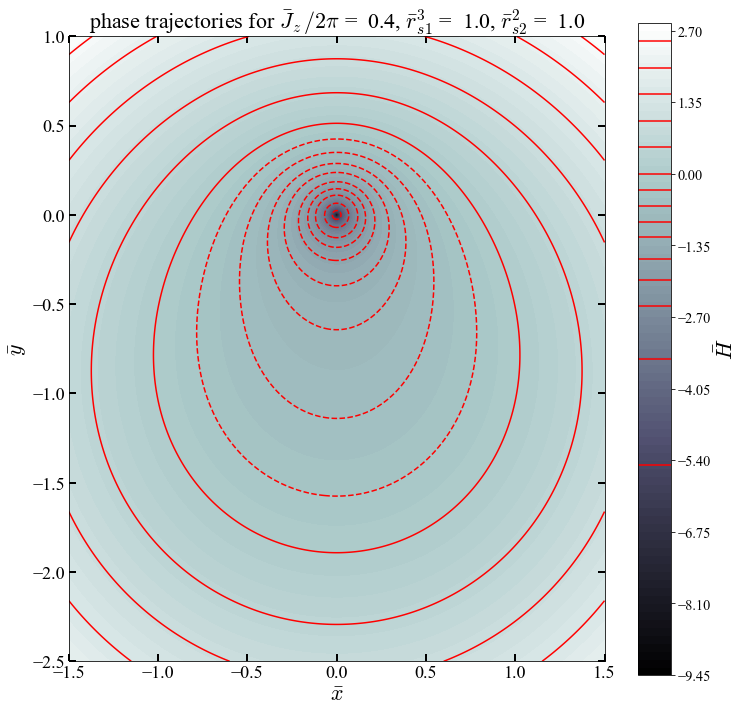

In [29]:
origin = 'lower'

fig1, ax2 = plt.subplots(figsize=[12.0,12.0])

CS = ax2.contourf(xt_values, yt_values, ht_values, 100, cmap=plt.cm.bone, origin=origin)

levels = [2.5,2.0,1.5,1.0,0.5,0.0,-0.3,-0.6,-0.9,-1.2,-1.6,-2.0,-2.5,-3.5,-5.5]

CS2 = ax2.contour(CS, levels=levels, colors='r', origin=origin)
# CS2 = ax2.contour(CS, levels=CS.levels[::5], colors='r', origin=origin)

ax2.set_title(r'phase trajectories for $\bar{J}_z \, / 2 \pi}$ = %4.1f, $\bar{r}_{s1}^3$ = %4.1f, $\bar{r}_{s2}^2$ = %4.1f' 
              % (j_z,rs1_3,rs2_2), fontsize=22)
ax2.set_xlabel(r'$\bar{x}$', fontsize=22)
ax2.set_ylabel(r'$\bar{y}$', fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax2.tick_params(which='major', length=7, width=2, direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$\bar{H}$', fontsize=22)
cbar.add_lines(CS2)
cbar.ax.tick_params(labelsize='x-large')
dummy = ax2.set_aspect('equal')

In [30]:
j_z = 0.4
a = 0.15
r_y = -1.0
r_x = 0.0

xt_values, yt_values, ht_values, rs1_3, rs2_2 = total_phase_space(j_z,a,r_x,r_y, num=1000)

J_z / 2 pi =  0.4
rs_1^3 =  6.7
rs_2^2 =  0.1


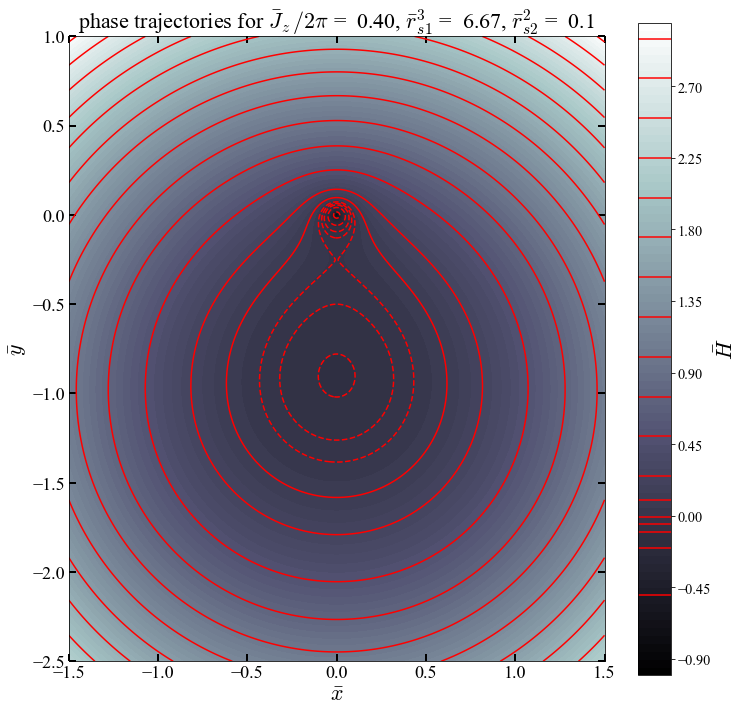

In [31]:
origin = 'lower'

fig1, ax2 = plt.subplots(figsize=[12.0,12.0])

CS = ax2.contourf(xt_values, yt_values, ht_values, 100, cmap=plt.cm.bone, origin=origin)

levels = [-0.5,-0.2,-0.1,-0.05,-0.004,0.1,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00]

CS2 = ax2.contour(CS, levels=levels, colors='r', origin=origin)
# CS2 = ax2.contour(CS, levels=CS.levels[::5], colors='r', origin=origin)

ax2.set_title(r'phase trajectories for $\bar{J}_z \, / 2 \pi}$ = %5.2f, $\bar{r}_{s1}^3$ = %5.2f, $\bar{r}_{s2}^2$ = %4.1f' 
              % (j_z,rs1_3,rs2_2), fontsize=22)
ax2.set_xlabel(r'$\bar{x}$', fontsize=22)
ax2.set_ylabel(r'$\bar{y}$', fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax2.tick_params(which='major', length=7, width=2, direction='in')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$\bar{H}$', fontsize=22)
cbar.add_lines(CS2)
cbar.ax.tick_params(labelsize='x-large')
dummy = ax2.set_aspect('equal')

## calculate the action angle mapping to calculate the phase space movement, $\psi(t)$

In [32]:
def action_angle_mapping(j_z, h, num=1000):
    psi_min = 0.0
    psi_max = 2.0 * pi
    psi_num = num

    psi_values, rho_phase_values, rho_phase_values_2, jd = rho_phase_plot(j_z, h)
    rho_interpolate = interp1d(psi_values, rho_phase_values, kind='linear', bounds_error = False, copy=True, 
                               fill_value=(rho_phase_values[0], rho_phase_values[-1]))
    
    psi_values = linspace(psi_min, psi_max, num=psi_num)
    t_values = zeros((psi_num))
    rho_values = zeros((psi_num))

    for i, psi in enumerate(psi_values):
        rho_values[i] = rho_interpolate(psi)
        if i < (rho_values.shape[0]-1):
            rho_values[i+1] = rho_interpolate(psi_values[i+1])
            t_values[i+1] = t_values[i] + 0.5 * (1.0/dpsi_dt_function(j_z, rho_values[i], psi_values[i]) +
                       1.0/dpsi_dt_function(j_z, rho_values[i+1], psi_values[i+1])) * (psi_values[i+1]-psi_values[i])
    psi_t = interp1d(t_values, psi_values, kind='linear', bounds_error = False, copy=True, 
                               fill_value=(psi_values[0], psi_values[-1]))
    rho_t = interp1d(t_values, rho_values, kind='linear', bounds_error = False, copy=True, 
                               fill_value=(rho_values[0], rho_values[-1]))
    return psi_t, rho_t, t_values[-1], jd

In [33]:
action_z_traj = 0.4
h_traj = -1.61
t_num = 1000

psi_t, rho_t, t_max, jd = action_angle_mapping(action_z_traj, h_traj, num=t_num)
rho_s = rho_s_interpolate(action_z_traj)
h_s = h_s_interpolate(action_z_traj)

omega_d = 2.0 * pi / t_max
print('J_z = %5.2f' % action_z_traj)
print('H = %5.2f\n' % h_traj)
print('ExB drift period = %5.2f' % t_max)
print('ExB drift frequency = %5.2f' % omega_d)
print('J_D = %5.2f' % jd)
print('rho_s = %5.2f' % rho_s)
print('H_s = %5.2f' % h_s)
print('H_min = %7.2f' % (- 2.0 / action_z_traj**2))


J_z =  0.40
H = -1.61

ExB drift period =  2.15
ExB drift frequency =  2.93
J_D =  0.45
rho_s =  0.70
H_s = -1.60
H_min =  -12.50


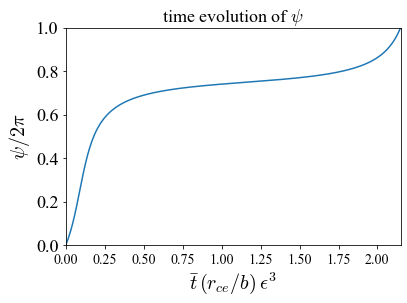

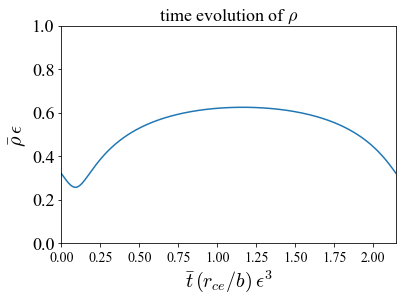

In [34]:
t_values = linspace(0.0, t_max, num=t_num)

plt.figure()
plt.plot(t_values,psi_t(t_values)/(2.0*pi))
dummy = plt.title(r'time evolution of $\psi$', fontsize=18)
dummy = plt.xlabel(r'$\bar{t} \, (r_{ce}/b) \, \epsilon^3$', fontsize=20)
dummy = plt.ylabel(r'$\psi / 2 \pi$', fontsize=20)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([0.0,t_max])
dummy = plt.ylim([0.0,1.0])

plt.figure()
plt.plot(t_values,rho_t(t_values))
dummy = plt.title(r'time evolution of $\rho$', fontsize=18)
dummy = plt.xlabel(r'$\bar{t} \, (r_{ce}/b) \, \epsilon^3$', fontsize=20)
dummy = plt.ylabel(r'$\bar{\rho} \, \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([0.0,t_max])
dummy = plt.ylim([0.0,1.0])

### animate phase space trajectory

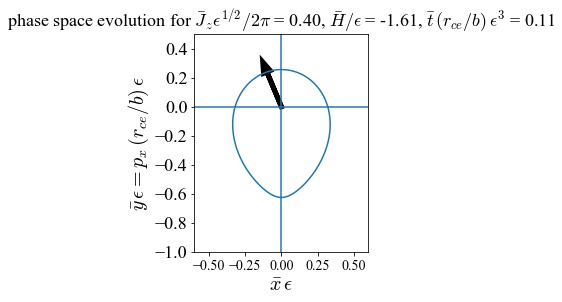

In [35]:
idx = 50

xx = rho_t(t_values)*cos(psi_t(t_values))
yy = rho_t(t_values)*sin(psi_t(t_values))
tt = t_values

# xx = flip(xx)
# yy = flip(yy)

fig, ax = plt.subplots()

dummy = plt.plot(xx, yy)
dummy = plt.title(r'phase space evolution for $\bar{J}_z \epsilon^{1/2} / 2 \pi$ = %4.2f, $\bar{H}/\epsilon$ = %4.2f, $\bar{t} \, (r_{ce}/b) \, \epsilon^3$ = %4.2f' % (action_z_traj, h_traj, t_values[idx]), fontsize=18)
dummy = plt.xlabel(r'$\bar{x} \, \epsilon$', fontsize=20)
dummy = plt.ylabel(r'$\bar{y} \, \epsilon = p_x \, (r_{ce}/b) \, \epsilon$', fontsize=20)
dummy = plt.xticks(fontsize=14)
dummy = plt.yticks(fontsize=18)
dummy = plt.xlim([-0.6,0.6])
dummy = plt.ylim([-1.0,0.5])
dummy = ax.set_aspect('equal')
dummy = plt.hlines(0.0,-0.6,1.0)
dummy = plt.vlines(0.0,-1.0,0.5)
dummy = plt.arrow(0.0,0.0,xx[idx],yy[idx], linewidth=5, head_width=0.05,color='k')


In [36]:
savez(expanduser('~/tmp/output_data.npz'), xx=xx, yy=yy, tt=tt, action_z_traj=action_z_traj, h_traj=h_traj)

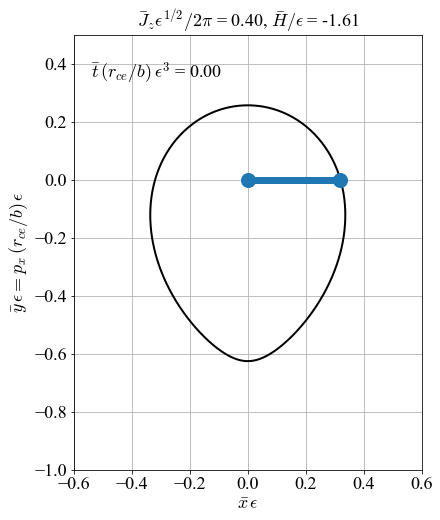

In [37]:
from os.path import expanduser, join
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

with np.load(expanduser('~/tmp/output_data.npz')) as data:
    xx = data['xx']
    yy = data['yy']
    tt = data['tt']
    action_z_traj = data['action_z_traj']
    h_traj = data['h_traj']
    
dt = 1.0 * tt[1]  # period of 1 is 1 s

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.6, 0.6), ylim=(-1.0, 0.5))
ax.set_aspect('equal')
ax.grid()
ax.plot(xx,yy, 'k-', lw=2)
ax.set_title(r'$\bar{J}_z \epsilon^{1/2} / 2 \pi$ = %4.2f, $\bar{H}/\epsilon$ = %4.2f' % (action_z_traj,h_traj), fontsize=18)
ax.set_xlabel(r'$\bar{x} \, \epsilon$', fontsize=18)
ax.set_ylabel(r'$\bar{y} \, \epsilon = p_x \, (r_{ce}/b) \, \epsilon$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

line, = ax.plot([], [], 'o-', lw=7, ms=14)
time_template = r'$\bar{t} \, (r_{ce}/b) \, \epsilon^3$ = %4.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize=18)

def animate(i):
    thisx = [0, xx[i]]
    thisy = [0, yy[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (tt[i]))
    return line, time_text

ani = animation.FuncAnimation(
    fig, animate, len(tt), interval=dt*1000, blit=True)
plt.show()

In [45]:
file_name = expanduser('~/tmp/phase_space.mp4') # 'mov', 'mp4', 'avi', 'gif'
# writervideo = animation.PillowWriter(fps=30)  # 'gif'
writervideo = animation.FFMpegWriter(fps=60)  # 'mov', 'mp4', 'avi'
ani.save(file_name, writer=writervideo)

In [39]:
file_name = expanduser('~/tmp/phase_space.html') 
with open(file_name, "w") as f:
    print(ani.to_html5_video(), file=f, interval)